In [ ]:
# 1 week Report(3)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/wjdwl/Desktop/Data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
n_df= df.drop('Outcome',axis=1)
n_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [64]:
x=n_df.drop('BMI',axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [66]:
y = n_df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 47.94585112391044


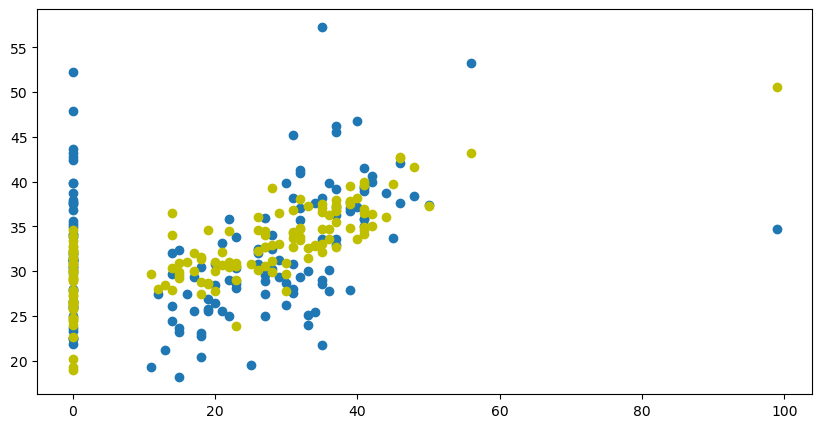

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [ ]:
# DT

In [43]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 101.07363636363635


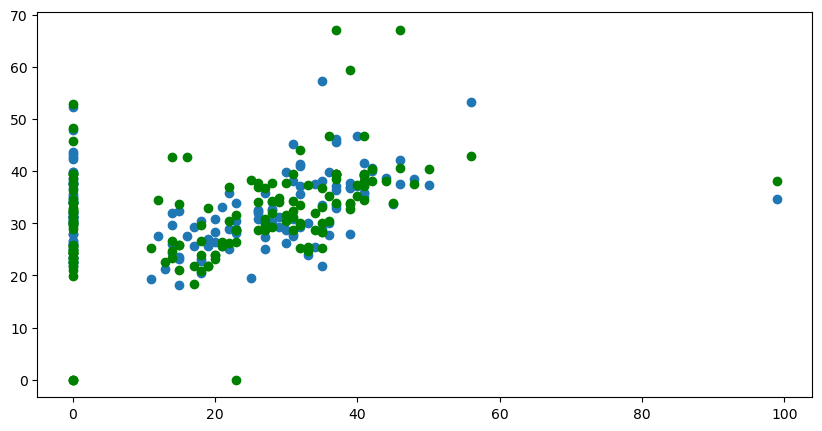

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show() 

In [ ]:
# RF

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 43.18769672727272


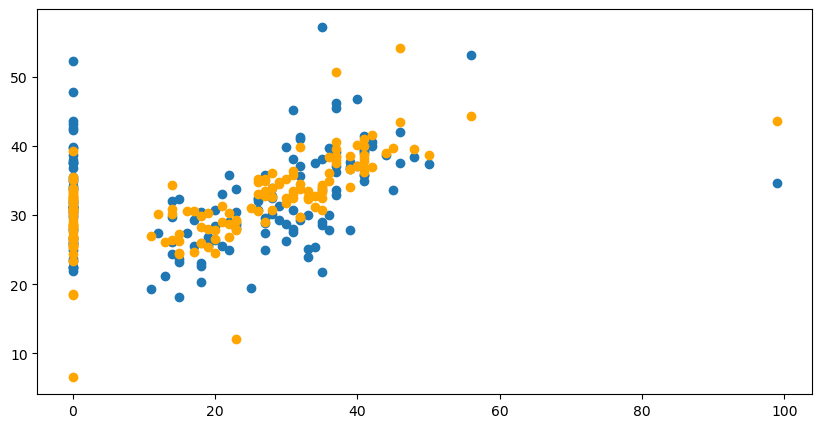

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [ ]:
# SVM

In [53]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 46.127621195271104


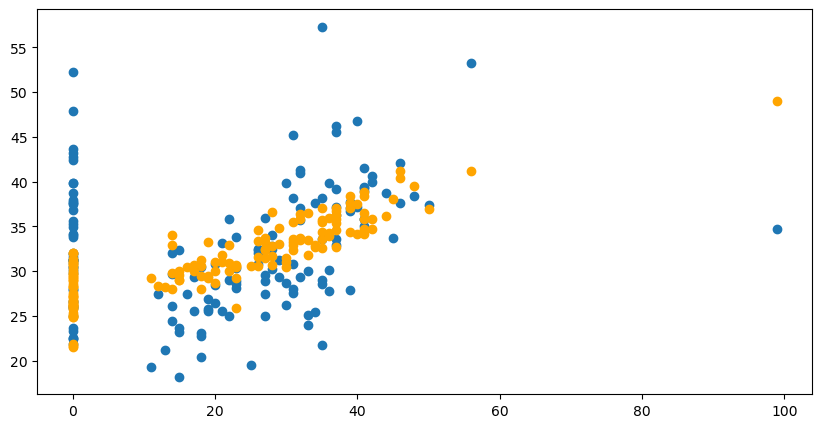

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show() 